Top Categories by Best-Seller Proportion:
 category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Name: True, dtype: float64
Chi-square Statistic: 36540.20270061387, p-value: 0.0, Cramér's V: 0.1222829439760564



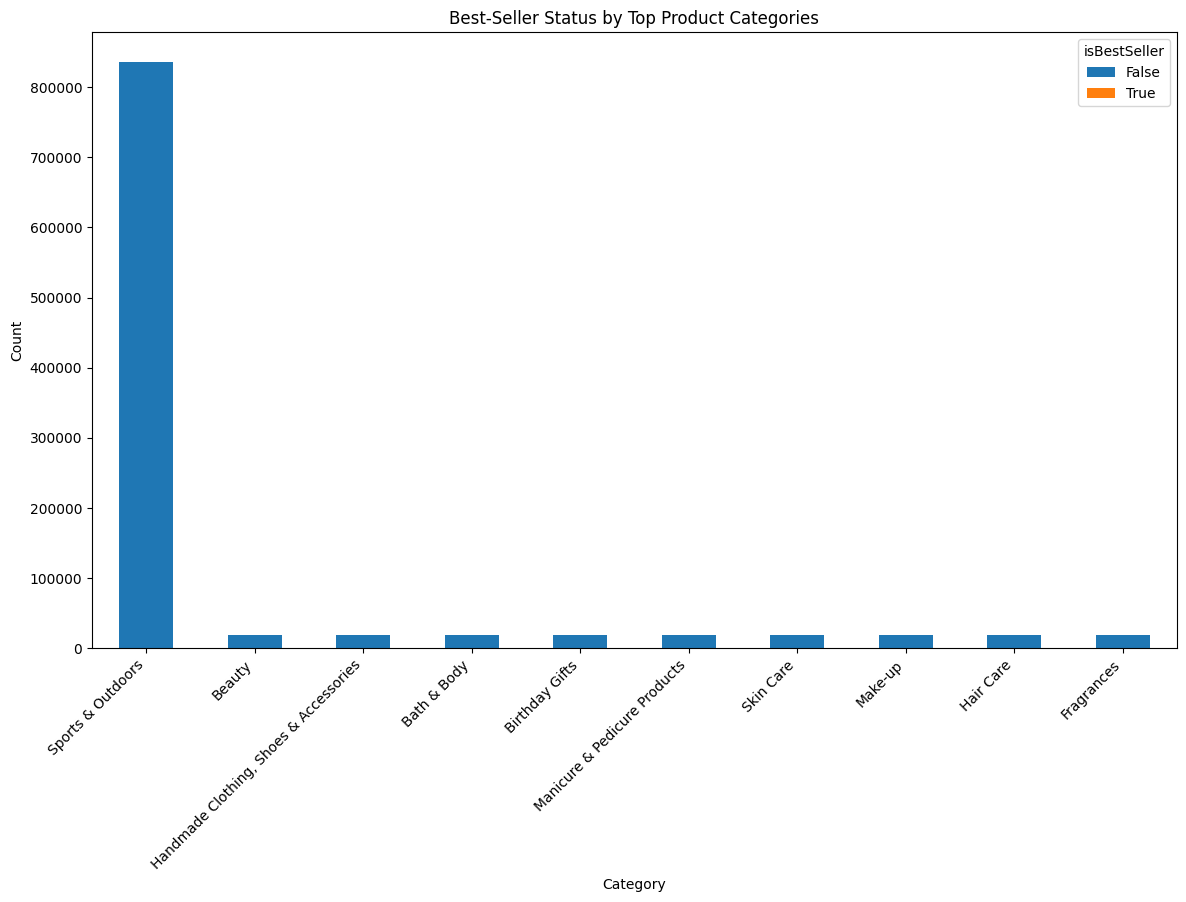

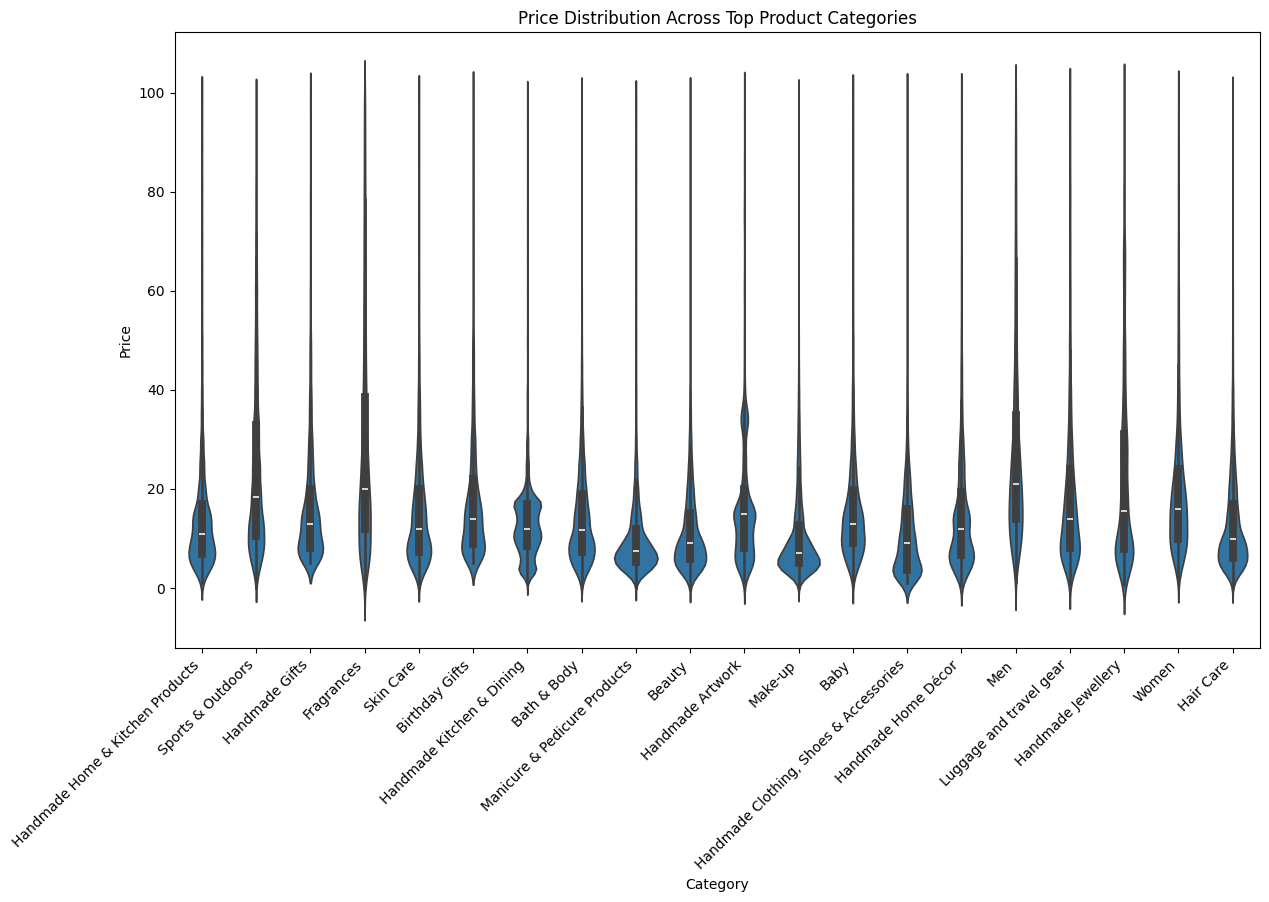

Correlation between Price and Rating: -0.07767299878181444



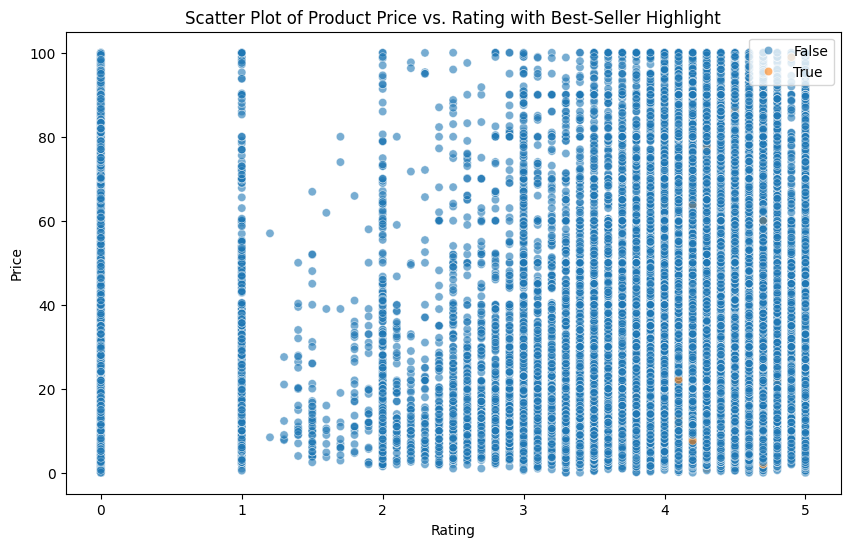

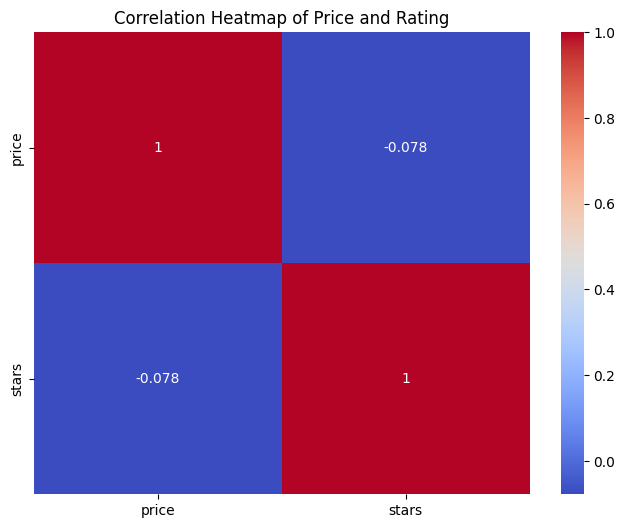

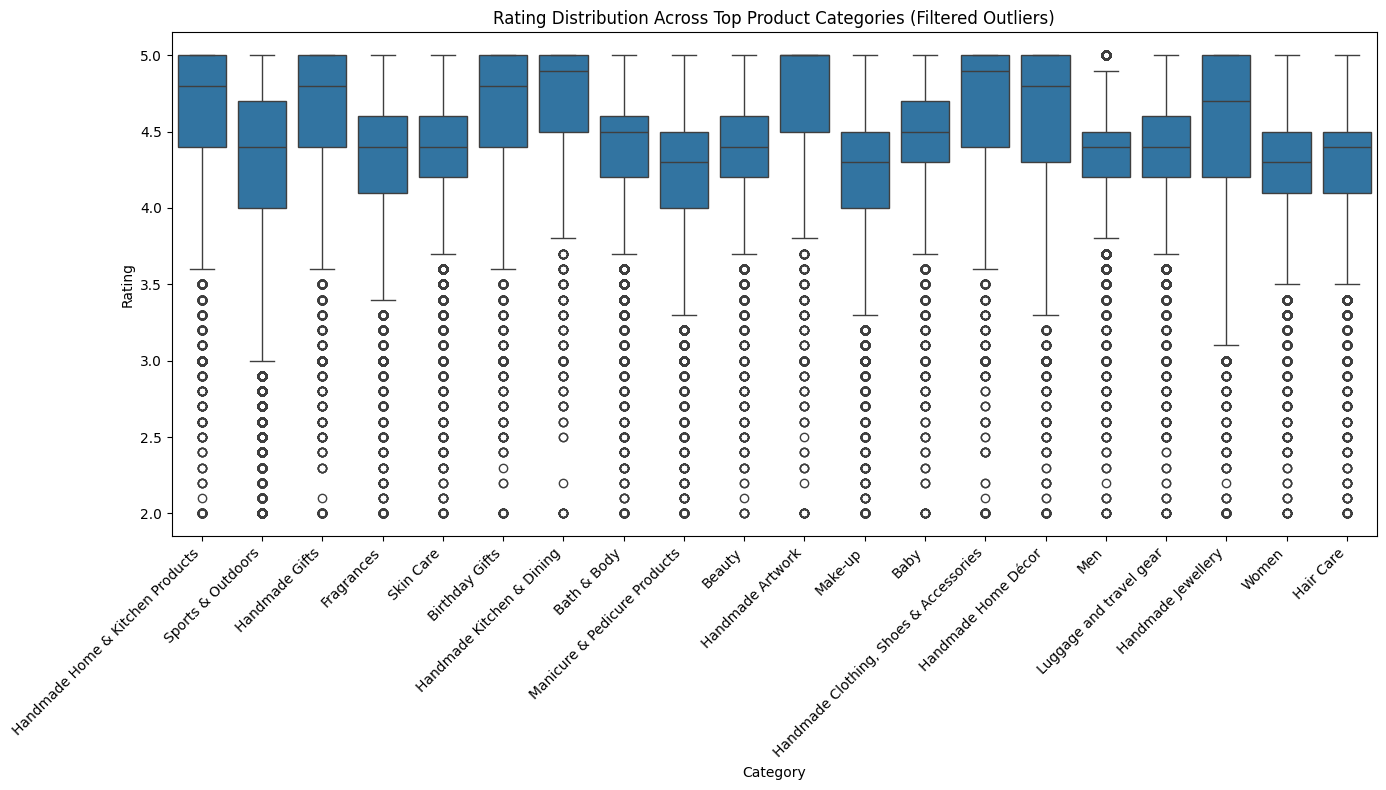

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Load dataset:
df = pd.read_csv('C:/Users/Marc Jay/Ironhack/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

# Part 1 - Analyzing Best-Seller Trends Across Product Categories:
category_bestseller_crosstab = pd.crosstab(df['category'], df['isBestSeller'])
category_bestseller_proportion = category_bestseller_crosstab.div(category_bestseller_crosstab.sum(axis=1), axis=0)
sorted_proportion = category_bestseller_proportion[True].sort_values(ascending=False)

print("Top Categories by Best-Seller Proportion:\n", sorted_proportion.head())

chi2, p, dof, expected = chi2_contingency(category_bestseller_crosstab)
cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(category_bestseller_crosstab.shape) - 1)))
print(f"Chi-square Statistic: {chi2}, p-value: {p}, Cramér's V: {cramers_v}\n")

# Visualization - Stacked Bar Chart for Best-Seller Status by Product Category:
top_10_cats = category_bestseller_crosstab.sum(axis=1).nlargest(10).index
category_bestseller_crosstab.loc[top_10_cats].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Best-Seller Status by Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Part 2 - Exploring Product Prices by Categories:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

top_categories = df_no_outliers['category'].value_counts().head(20).index

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top_categories)], x='category', y='price')
plt.title('Price Distribution Across Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Part 3 - Price and Ratings Relationship:
price_rating_corr = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation between Price and Rating: {price_rating_corr}\n")

# Scatter Plot (Sampled for Performance):
sample_df = df_no_outliers.sample(frac=0.1, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='stars', y='price', hue='isBestSeller', alpha=0.6)
plt.title('Scatter Plot of Product Price vs. Rating with Best-Seller Highlight')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

# Correlation Heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(df_no_outliers[['price', 'stars']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Price and Rating')
plt.show()

# Part 4 - Investigating Prices and Reviews:
# (Filtering out extreme outliers for clearer visualization.)
filtered_df = df_no_outliers[(df_no_outliers['stars'] >= 2) & (df_no_outliers['stars'] <= 5)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df[filtered_df['category'].isin(top_categories)], x='category', y='stars')
plt.title('Rating Distribution Across Top Product Categories (Filtered Outliers)')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()